<a href="https://colab.research.google.com/github/Utkarsh-TG/AashiProject/blob/main/markoff_decision_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import time
import numpy as np
import matplotlib.pyplot as plt

N = 1000
_lambda = 0.1
epsilon = 0.01

In [132]:
states = np.linspace(0, N, N+1, dtype=int)
actions = []
for n in states:
  actions.append(np.linspace(0, n, n+1, dtype=int))

In [133]:
def P(s_next, s, a):
  if s - a == s_next:
    return 1
  else:
    return 0

In [134]:
def R(s, a):
  return((0.9**t)*np.sqrt(a) + 0.5*0.05*(s-a) + 0.5*0.12*(s-a))

In [135]:
def check_break(prev_best_val, next_best_val):
  for i in range(0, len(prev_best_val)):
    p_b_v, n_b_v = prev_best_val[i], next_best_val[i]
    if (n_b_v - p_b_v) < (epsilon*(1-_lambda)/2*_lambda):
      if i == len(prev_best_val)-1:
        return True
    else:
      return False

In [136]:
def value_iteration(S, A):
    V = {s: 0 for s in S}
    optimal_policy = {s:0 for s in S}
    
    while True:
        oldV = V.copy()
        
        for s in S:

            Q = {}

            for a in A[s]:
                Q[a] = R(s, a) + _lambda*sum(P(s_next,s,a) * oldV[s_next] for s_next in S)

            V[s] = max(Q.values())
            optimal_policy[s] = max(Q, key=Q.get)
       
        if check_break(list(oldV.values()), list(V.values())):
            break
            
    return V, optimal_policy

In [137]:
t = int(input("Enter time period: "))

Enter time period: 0


Value Iteration Execution: 2791871066522 nanoseconds


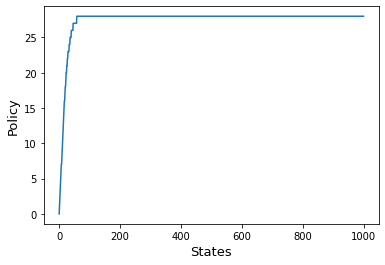

In [138]:
start_time = time.process_time_ns()
v, optimal_policy = value_iteration(states, actions)
end_time = time.process_time_ns()
print("Value Iteration Execution: " + str(end_time - start_time) + " nanoseconds")

plt.plot(list(optimal_policy.keys()), list(optimal_policy.values()))
plt.xlabel("States", fontsize='13')
plt.ylabel("Policy", fontsize='13')
plt.show()

In [139]:
def policy_evaluation(policy, S):
  V = {s: 0 for s in S}
  
  oldV = V.copy()
  
  for s in S:
    a = policy[s]
    V[s] = R(s,a) + _lambda*sum(P(s_next,s,a) * oldV[s_next] 
                      for s_next in S)
  
  return V

In [140]:
def policy_improvement(V, S, A):
  policy = {s: A[s][0] for s in S}

  for s in S:
    Q = {}

    for a in A[s]:
      Q[a] = R(s,a) + _lambda*sum(P(s_next,s,a) * V[s_next]
                          for s_next in S)
      
    policy[s] = max(Q, key=Q.get)
  
  return policy

In [141]:
def policy_iteration(S, A):
  policy = {s: A[s][0] for s in S}
  while True:
    old_policy = policy.copy()

    V = policy_evaluation(policy, S)
    
    policy = policy_improvement(V, S, A)
    
    if all(old_policy[s] == policy[s] for s in S):
      break

  return policy

Value Iteration Execution: 11682023 nanoseconds


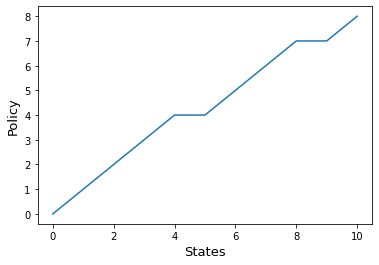

In [120]:
start_time = time.process_time_ns()
policy = policy_iteration(states, actions)
end_time = time.process_time_ns()
print("Value Iteration Execution: " + str(end_time - start_time) + " nanoseconds")

plt.plot(list(policy.keys()), list(policy.values()))
plt.xlabel("States", fontsize='13')
plt.ylabel("Policy", fontsize='13')
plt.show()

In [142]:
def updated_policy_evaluation(policy, S):
  V = {s: 0 for s in S}
  i = 0
  while i <= 10:
    i += 1 
    oldV = V.copy()

    for s in S:
      a = policy[s]
      V[s] = R(s,a) + _lambda*sum(P(s_next,s,a) * oldV[s_next] 
                          for s_next in S)
      
    if check_break(list(oldV.values()), list(V.values())):
      return V

In [143]:
def updated_policy_iteration():
  policy = {s: A[s][0] for s in S}
  while True:
    old_policy = policy.copy()

    V = updated_policy_evaluation(policy, S)
    
    policy = policy_improvement(V, S, A)
    
    if all(old_policy[s] == policy[s] for s in S):
      break

  return policy

In [ ]:
start_time = time.process_time_ns()
policy = policy_iteration(states, actions)
end_time = time.process_time_ns()
print("Value Iteration Execution: " + str(end_time - start_time) + " nanoseconds")

plt.plot(list(policy.keys()), list(policy.values()))
plt.xlabel("States", fontsize='13')
plt.ylabel("Policy", fontsize='13')
plt.show()

In [ ]:
Value Iteration - 47 minutes